# Result collection

The notebook is part of the domain-specific study, specifically recording the evaluation of different datasets.

## Logitics
- [Section 1: Scifact](#section_1)
- [Section 2: SCIDOCS](#section_2)
- [Section 3: NFCorpus](#section_3)
- [Section 4: SciQ](#section_4)
- [Section 5: RAG](#section_5)
- [Section 6: Others](#section_6)

In [ ]:
from helpers.helper import *

In [2]:
from helpers.evaluate import Evaluator

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import json
import random
import re

# for evaluation
from beir.retrieval.evaluation import EvaluateRetrieval
import csv
import pickle as pkl
import matplotlib.pyplot as plt

from pyserini.search.lucene import LuceneSearcher

In [4]:
evaluator = EvaluateRetrieval()

## <a id='section_1'> Section 1: SciFact </a>

In [483]:
SCIFACT_DIR = os.path.join(ROOT_DIR, 'retrieval/runs_scifact')
scifact_qrels_test = load_qrels(os.path.join(ROOT_DIR, 'retrieval/task_topics/scifact/qrels/test.tsv'))
scifact_qrels_train = load_qrels(os.path.join(ROOT_DIR, 'retrieval/task_topics/scifact/qrels/train.tsv'))
scifact_qrels_reformat = {('scifact-' + k) : v for k, v in list(scifact_qrels_train.items()) + list(scifact_qrels_test.items())}

In [484]:
scifact_evaluator = Evaluator(task='scifact', golden_qrels=scifact_qrels_reformat, data_dir=SCIFACT_DIR, evaluator=evaluator)

In [485]:
scifact_bm25_chunk_dict = scifact_evaluator.evaluate_bm25('run.bm25.hits-100.txt')
scifact_bm25_chunk_dict

100%|██████████| 28281/28281 [00:00<00:00, 219083.64it/s]


{'NDCG@5': 0.64652,
 'NDCG@20': 0.69168,
 'Recall@5': 0.7192,
 'Recall@20': 0.85271}

In [15]:
# all is the results including all the queries
# scifact_all_chunk_dict = scifact_evaluator.evaluate(lambda encoder: f'run.all.chunk.{encoder}.hits-500.txt', add_task_prefix=True)
# single
scifact_whole_chunk_dict = scifact_evaluator.evaluate(lambda encoder: f'run.whole.chunk.{encoder}.hits-500.txt')
scifact_whole_prop_dict = scifact_evaluator.evaluate(lambda encoder: f'run.whole.prop.{encoder}.hits-500.txt')
scifact_whole_conv_dict = scifact_evaluator.evaluate(lambda encoder: f'rrf/conv.tsv')

# ablation study
scifact_rrf_whole_prop_dict = scifact_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max.tsv')
scifact_rrf_whole_conv_dict = scifact_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_conv.tsv')
scifact_rrf_prop_conv_dict = scifact_evaluator.evaluate(lambda encoder: f'run.rrf.chunk.{encoder}.hits-500.txt')

# complete rrf
scifact_whole_rrf_chunk_dict = scifact_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max_conv.tsv')

100%|██████████| 141500/141500 [00:00<00:00, 201015.15it/s]


In [16]:
scifact_ndcg = [scifact_whole_chunk_dict, scifact_whole_prop_dict, scifact_whole_conv_dict, scifact_whole_rrf_chunk_dict]

In [17]:
print('whole-chunk | whole-prop | conv | rrf |')
scifact_evaluator.display_metrics(scifact_ndcg)

whole-chunk | whole-prop | conv | rrf |
NDCG@5
ance
41.5|43.3|43.5|46.8
NDCG@5
contriever
64.5|64.0|63.2|66.4
NDCG@5
dpr
31.8|36.1|37.1|39.4
NDCG@5
gtr
58.3|60.6|58.4|60.9
NDCG@5
simcse
27.1|32.8|32.7|34.8
NDCG@5
tasb
60.1|60.7|61.7|62.7
avg
47.2|49.6|49.4|51.8
NDCG@20
ance
45.3|46.4|47.3|49.9
NDCG@20
contriever
68.5|68.9|67.5|71.0
NDCG@20
dpr
37.7|40.5|41.3|43.6
NDCG@20
gtr
62.2|63.3|62.0|64.5
NDCG@20
simcse
31.2|37.2|36.9|39.8
NDCG@20
tasb
65.6|64.4|65.0|66.9
avg
51.8|53.5|53.4|56.0
Recall@5
ance
51.2|51.4|50.2|54.4
Recall@5
contriever
74.2|72.1|71.1|74.6
Recall@5
dpr
39.4|44.4|43.0|47.3
Recall@5
gtr
65.6|68.9|67.1|68.9
Recall@5
simcse
32.8|41.2|40.1|42.6
Recall@5
tasb
67.1|71.4|70.5|72.4
avg
55.0|58.2|57.0|60.0
Recall@20
ance
63.1|61.3|62.9|64.6
Recall@20
contriever
86.8|87.6|84.9|89.4
Recall@20
dpr
59.0|58.8|56.6|60.9
Recall@20
gtr
78.1|77.5|78.6|80.3
Recall@20
simcse
47.0|56.0|54.7|59.0
Recall@20
tasb
85.3|83.3|81.2|85.9
avg
69.9|70.7|69.8|73.3


In [18]:
scifact_ablation = [scifact_rrf_whole_prop_dict, scifact_rrf_whole_conv_dict, scifact_rrf_prop_conv_dict, scifact_whole_rrf_chunk_dict]
scifact_evaluator.display_metrics(scifact_ablation)

NDCG@5
ance
45.8|46.8|44.9|46.8
NDCG@5
contriever
65.6|66.3|65.0|66.4
NDCG@5
dpr
35.0|38.3|38.0|39.4
NDCG@5
gtr
60.9|60.6|61.5|60.9
NDCG@5
simcse
32.3|33.1|33.9|34.8
NDCG@5
tasb
61.4|63.2|62.1|62.7
avg
50.2|51.4|50.9|51.8
NDCG@20
ance
48.9|50.4|48.6|49.9
NDCG@20
contriever
69.9|70.8|69.5|71.0
NDCG@20
dpr
40.8|42.4|42.1|43.6
NDCG@20
gtr
64.5|64.7|64.4|64.5
NDCG@20
simcse
37.0|37.4|39.0|39.8
NDCG@20
tasb
66.7|67.3|65.3|66.9
avg
54.6|55.5|54.8|56.0
Recall@5
ance
54.6|53.5|50.6|54.4
Recall@5
contriever
75.2|74.8|73.4|74.6
Recall@5
dpr
43.0|46.7|45.9|47.3
Recall@5
gtr
68.0|68.5|70.0|68.9
Recall@5
simcse
41.0|41.8|42.0|42.6
Recall@5
tasb
69.9|72.1|72.9|72.4
avg
58.6|59.6|59.1|60.0
Recall@20
ance
64.5|65.2|62.2|64.6
Recall@20
contriever
88.7|89.2|87.7|89.4
Recall@20
dpr
62.1|59.9|59.1|60.9
Recall@20
gtr
79.3|81.6|79.5|80.3
Recall@20
simcse
56.2|55.4|59.3|59.0
Recall@20
tasb
87.4|85.5|83.0|85.9
avg
73.0|72.8|71.8|73.3


## <a id='section_2'> Section 2: SciDocs </a>

In [19]:
SCIDOCS_DIR = os.path.join(ROOT_DIR, 'retrieval/runs_scidocs')
scidocs_qrels = load_qrels(os.path.join(ROOT_DIR, 'retrieval/task_topics/scidocs/qrels/test.tsv'))

In [20]:
scidocs_evaluator = Evaluator(task='scidocs', golden_qrels=scidocs_qrels, data_dir=SCIDOCS_DIR, evaluator=evaluator)

In [21]:
scidocs_bm25_chunk_dict = scidocs_evaluator.evaluate_bm25('run.bm25.hits-100.txt')
scidocs_bm25_chunk_dict

100%|██████████| 20600/20600 [00:00<00:00, 214749.30it/s]


{'NDCG@5': 0.14767,
 'NDCG@20': 0.19924,
 'Recall@5': 0.13204,
 'Recall@20': 0.23932}

In [22]:
# scidocs_all_chunk_dict = scidocs_evaluator.evaluate(lambda encoder: f'run.all.chunk.{encoder}.hits-500.txt')
# single granularity
scidocs_whole_chunk_dict = scidocs_evaluator.evaluate(lambda encoder: f'run.whole.chunk.{encoder}.hits-500.txt')
scidocs_whole_prop_dict = scidocs_evaluator.evaluate(lambda encoder: f'run.whole.prop.{encoder}.hits-500.txt')
scidocs_whole_conv_dict = scidocs_evaluator.evaluate(lambda encoder: f'rrf/conv.tsv')

# ablation study
scidocs_rrf_whole_prop_dict = scidocs_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max.tsv')
scidocs_rrf_whole_conv_dict = scidocs_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_conv.tsv')
scidocs_rrf_prop_conv_dict = scidocs_evaluator.evaluate(lambda encoder: f'run.rrf.chunk.{encoder}.hits-500.txt')

# rrf
scidocs_whole_rrf_chunk_dict = scidocs_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max_conv.tsv')

100%|██████████| 103000/103000 [00:00<00:00, 201015.15it/s]


In [23]:
scidocs_ndcg = [scidocs_whole_chunk_dict, scidocs_whole_prop_dict, scidocs_whole_conv_dict, scidocs_whole_rrf_chunk_dict]

In [24]:
print('whole-chunk | whole-prop | conv | rrf')
scidocs_evaluator.display_metrics(scidocs_ndcg)

whole-chunk | whole-prop | conv | rrf
NDCG@5
ance
9.3|9.2|7.5|9.6
NDCG@5
contriever
13.5|14.5|13.5|15.5
NDCG@5
dpr
7.3|7.8|6.4|8.2
NDCG@5
gtr
13.6|13.2|11.6|13.6
NDCG@5
simcse
7.6|8.2|7.3|9.1
NDCG@5
tasb
13.8|14.3|12.6|14.0
avg
10.9|11.2|9.8|11.7
NDCG@20
ance
13.1|12.9|11.9|14.1
NDCG@20
contriever
18.5|19.4|18.3|20.7
NDCG@20
dpr
10.4|10.6|10.0|11.5
NDCG@20
gtr
18.9|18.0|16.2|19.2
NDCG@20
simcse
9.7|11.1|10.5|12.2
NDCG@20
tasb
19.3|18.1|17.2|19.6
avg
15.0|15.0|14.0|16.2
Recall@5
ance
8.6|7.9|6.7|8.6
Recall@5
contriever
12.4|12.8|12.1|13.8
Recall@5
dpr
6.7|6.8|5.8|7.0
Recall@5
gtr
12.7|12.1|10.2|12.4
Recall@5
simcse
6.9|7.1|6.9|8.4
Recall@5
tasb
12.4|13.0|11.4|12.5
avg
10.0|10.0|8.8|10.5
Recall@20
ance
16.5|15.4|15.9|17.9
Recall@20
contriever
22.9|23.1|22.2|24.7
Recall@20
dpr
13.3|12.6|13.5|13.9
Recall@20
gtr
23.4|22.3|20.1|24.1
Recall@20
simcse
11.2|13.2|13.3|15.0
Recall@20
tasb
23.8|21.0|21.1|24.3
avg
18.5|17.9|17.7|20.0


In [25]:
scidocs_ablation = [scidocs_rrf_whole_prop_dict, scidocs_rrf_whole_conv_dict, scidocs_rrf_prop_conv_dict, scidocs_whole_rrf_chunk_dict]
scidocs_evaluator.display_metrics(scidocs_ablation)

NDCG@5
ance
10.0|9.0|8.8|9.6
NDCG@5
contriever
14.8|14.6|14.7|15.5
NDCG@5
dpr
8.2|7.5|8.0|8.2
NDCG@5
gtr
13.4|13.8|12.6|13.6
NDCG@5
simcse
8.7|8.5|8.5|9.1
NDCG@5
tasb
13.8|13.8|13.6|14.0
avg
11.5|11.2|11.0|11.7
NDCG@20
ance
13.7|13.4|13.4|14.1
NDCG@20
contriever
20.0|20.1|20.0|20.7
NDCG@20
dpr
11.2|11.2|11.2|11.5
NDCG@20
gtr
18.9|19.5|18.0|19.2
NDCG@20
simcse
11.5|11.6|11.9|12.2
NDCG@20
tasb
19.2|19.6|18.8|19.6
avg
15.7|15.9|15.5|16.2
Recall@5
ance
9.1|8.3|7.9|8.6
Recall@5
contriever
13.2|13.5|13.1|13.8
Recall@5
dpr
7.0|6.6|7.0|7.0
Recall@5
gtr
12.4|12.6|11.3|12.4
Recall@5
simcse
7.9|8.1|8.0|8.4
Recall@5
tasb
12.2|12.2|12.1|12.5
avg
10.3|10.2|9.9|10.5
Recall@20
ance
16.6|17.6|17.6|17.9
Recall@20
contriever
24.3|24.9|23.9|24.7
Recall@20
dpr
13.3|14.1|13.7|13.9
Recall@20
gtr
23.7|24.7|22.4|24.1
Recall@20
simcse
13.8|14.4|15.2|15.0
Recall@20
tasb
23.5|24.3|22.9|24.3
avg
19.2|20.0|19.3|20.0


## <a id='section_3'> Section 3: NFCorpus </a>

In [26]:
NFCORPUS_DIR = os.path.join(ROOT_DIR, 'retrieval/runs_nfcorpus')
nfcorpus_qrels = load_qrels(os.path.join(ROOT_DIR, 'retrieval/task_topics/nfcorpus/origin/agg_qrels.tsv'))

In [27]:
nfcorpus_evaluator = Evaluator(task='nfcorpus', golden_qrels=nfcorpus_qrels, data_dir=NFCORPUS_DIR, evaluator=evaluator)

In [28]:
nfcorpus_bm25_chunk_dict = nfcorpus_evaluator.evaluate_bm25('run.bm25.hits-100.txt')
nfcorpus_bm25_chunk_dict

100%|██████████| 64602/64602 [00:00<00:00, 222209.45it/s]


{'NDCG@5': 0.37759,
 'NDCG@20': 0.30657,
 'Recall@5': 0.10251,
 'Recall@20': 0.19169}

In [29]:
# nfcorpus_all_chunk_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'run.all.chunk.{encoder}.hits-500.txt')

nfcorpus_whole_chunk_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'run.whole.chunk.{encoder}.hits-500.txt')
nfcorpus_whole_prop_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'run.whole.prop.{encoder}.hits-500.txt')
nfcorpus_whole_conv_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'rrf/conv.tsv')

nfcorpus_rrf_whole_prop_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max.tsv')
nfcorpus_rrf_whole_conv_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_conv.tsv')
nfcorpus_rrf_prop_conv_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'run.rrf.chunk.{encoder}.hits-500.txt')

nfcorpus_whole_rrf_chunk_dict = nfcorpus_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max_conv.tsv')

100%|██████████| 323500/323500 [00:01<00:00, 202287.20it/s]


In [30]:
nfcorpus_ndcg = [nfcorpus_whole_chunk_dict, nfcorpus_whole_prop_dict, nfcorpus_whole_conv_dict, nfcorpus_whole_rrf_chunk_dict]

In [31]:
print('whole-chunk | whole-prop | conv | rrf')
nfcorpus_evaluator.display_metrics(nfcorpus_ndcg)

whole-chunk | whole-prop | conv | rrf
NDCG@5
ance
29.9|29.4|30.3|31.9
NDCG@5
contriever
42.2|43.0|41.4|44.0
NDCG@5
dpr
25.1|25.2|26.5|27.7
NDCG@5
gtr
42.1|42.3|41.5|43.3
NDCG@5
simcse
16.2|20.0|22.8|22.3
NDCG@5
tasb
42.3|42.5|40.9|43.6
avg
33.0|33.7|33.9|35.5
NDCG@20
ance
24.4|24.0|24.5|25.9
NDCG@20
contriever
34.9|35.5|34.9|37.1
NDCG@20
dpr
20.7|20.6|21.4|22.9
NDCG@20
gtr
34.1|34.4|33.6|35.6
NDCG@20
simcse
13.3|16.4|18.3|18.1
NDCG@20
tasb
34.1|34.4|33.1|35.2
avg
26.9|27.6|27.6|29.1
Recall@5
ance
7.8|7.7|7.6|8.4
Recall@5
contriever
11.5|11.8|11.1|12.2
Recall@5
dpr
6.7|6.8|6.8|7.3
Recall@5
gtr
11.3|10.9|10.4|11.3
Recall@5
simcse
4.1|5.2|5.8|5.8
Recall@5
tasb
11.2|11.4|10.7|11.6
avg
8.7|9.0|8.7|9.4
Recall@20
ance
14.9|15.1|14.9|15.9
Recall@20
contriever
21.5|21.9|21.4|22.9
Recall@20
dpr
12.8|12.7|13.2|14.3
Recall@20
gtr
20.4|20.5|20.3|21.5
Recall@20
simcse
8.3|10.0|11.0|11.0
Recall@20
tasb
20.7|20.8|19.6|21.1
avg
16.4|16.8|16.8|17.8


In [32]:
nfcorpus_ablation = [nfcorpus_rrf_whole_prop_dict, nfcorpus_rrf_whole_conv_dict, nfcorpus_rrf_prop_conv_dict, nfcorpus_whole_rrf_chunk_dict]
nfcorpus_evaluator.display_metrics(nfcorpus_ablation)

NDCG@5
ance
30.7|32.0|30.8|31.9
NDCG@5
contriever
43.6|43.0|43.2|44.0
NDCG@5
dpr
26.5|27.5|26.6|27.7
NDCG@5
gtr
43.2|43.0|42.4|43.3
NDCG@5
simcse
19.6|21.4|22.8|22.3
NDCG@5
tasb
42.9|42.9|42.7|43.6
avg
34.4|35.0|34.8|35.5
NDCG@20
ance
25.2|26.2|25.1|25.9
NDCG@20
contriever
36.2|36.6|36.3|37.1
NDCG@20
dpr
21.9|22.8|22.2|22.9
NDCG@20
gtr
35.2|35.5|34.9|35.6
NDCG@20
simcse
16.0|17.4|18.6|18.1
NDCG@20
tasb
34.7|34.9|34.5|35.2
avg
28.2|28.9|28.6|29.1
Recall@5
ance
7.7|8.4|8.0|8.4
Recall@5
contriever
12.1|11.5|11.9|12.2
Recall@5
dpr
7.0|7.5|7.3|7.3
Recall@5
gtr
11.4|11.2|10.7|11.3
Recall@5
simcse
5.1|5.5|6.0|5.8
Recall@5
tasb
11.5|11.5|11.4|11.6
avg
9.1|9.3|9.2|9.4
Recall@20
ance
15.5|15.9|15.6|15.9
Recall@20
contriever
22.3|22.8|22.4|22.9
Recall@20
dpr
13.5|14.1|14.0|14.3
Recall@20
gtr
21.0|21.3|21.1|21.5
Recall@20
simcse
9.9|10.5|11.2|11.0
Recall@20
tasb
21.0|21.0|20.8|21.1
avg
17.2|17.6|17.5|17.8


## <a id='section_4'> Section 4: SciQ </a>

In [33]:
SCIQ_DIR = os.path.join(ROOT_DIR, 'retrieval/runs_sciq')
sciq_qrels = load_qrels(os.path.join(ROOT_DIR, 'retrieval/task_topics/sciq/qrels.tsv'))

In [34]:
sciq_evaluator = Evaluator(task='sciq', golden_qrels=sciq_qrels, data_dir=SCIQ_DIR, evaluator=evaluator)

In [35]:
sciq_bm25_chunk_dict = sciq_evaluator.evaluate_bm25('run.bm25.hits-100.txt')
sciq_bm25_chunk_dict

100%|██████████| 25600/25600 [00:00<00:00, 213810.59it/s]


{'NDCG@5': 0.9191,
 'NDCG@20': 0.92225,
 'Recall@5': 0.97656,
 'Recall@20': 0.98828}

In [36]:
# sciq_all_chunk_dict = sciq_evaluator.evaluate(lambda encoder: f'run.all.chunk.{encoder}.hits-500.txt')
# single granularity
sciq_whole_chunk_dict = sciq_evaluator.evaluate(lambda encoder: f'run.whole.chunk.{encoder}.hits-500.txt')
sciq_whole_prop_dict = sciq_evaluator.evaluate(lambda encoder: f'run.whole.prop.{encoder}.hits-500.txt')
sciq_whole_conv_dict = sciq_evaluator.evaluate(lambda encoder: f'rrf/conv.tsv')

# ablation study
sciq_rrf_whole_prop_dict = sciq_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max.tsv')
sciq_rrf_whole_conv_dict = sciq_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_conv.tsv')
sciq_rrf_prop_conv_dict = sciq_evaluator.evaluate(lambda encoder: f'run.rrf.chunk.{encoder}.hits-500.txt')

# rrf
sciq_whole_rrf_chunk_dict = sciq_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max_conv.tsv')

100%|██████████| 128000/128000 [00:00<00:00, 213554.68it/s]


In [37]:
sciq_ndcg = [sciq_whole_chunk_dict, sciq_whole_prop_dict, sciq_whole_conv_dict, sciq_whole_rrf_chunk_dict]

In [38]:
print('chunk | prop | conv | rrf | rrf_w_chunk')
sciq_evaluator.display_metrics(sciq_ndcg)

chunk | prop | conv | rrf | rrf_w_chunk
NDCG@5
ance
66.4|62.3|66.1|74.4
NDCG@5
contriever
67.2|79.7|83.6|85.2
NDCG@5
dpr
60.6|63.6|67.7|73.6
NDCG@5
gtr
83.3|85.8|88.5|92.9
NDCG@5
simcse
62.3|75.6|80.9|84.0
NDCG@5
tasb
84.8|85.6|85.3|90.5
avg
70.8|75.4|78.7|83.5
NDCG@20
ance
69.1|66.4|69.1|76.8
NDCG@20
contriever
70.0|81.0|84.6|86.7
NDCG@20
dpr
64.1|67.9|70.7|76.1
NDCG@20
gtr
84.4|86.5|89.0|93.0
NDCG@20
simcse
67.3|78.5|83.2|85.5
NDCG@20
tasb
86.3|86.3|86.6|91.0
avg
73.5|77.8|80.5|84.9
Recall@5
ance
80.1|73.4|77.3|87.5
Recall@5
contriever
80.9|92.6|93.4|93.4
Recall@5
dpr
75.0|76.6|80.5|87.1
Recall@5
gtr
94.1|96.1|96.1|98.4
Recall@5
simcse
72.7|85.9|88.7|93.0
Recall@5
tasb
93.0|96.1|93.4|97.3
avg
82.6|86.8|88.2|92.8
Recall@20
ance
89.1|87.5|87.9|95.7
Recall@20
contriever
90.2|96.9|96.5|98.0
Recall@20
dpr
85.9|91.0|90.6|95.3
Recall@20
gtr
97.7|98.4|97.7|98.8
Recall@20
simcse
89.5|96.1|95.7|97.7
Recall@20
tasb
97.7|98.4|97.7|98.8
avg
91.7|94.7|94.3|97.4


In [39]:
sciq_ablation = [sciq_rrf_whole_prop_dict, sciq_rrf_whole_conv_dict, sciq_rrf_prop_conv_dict, sciq_whole_rrf_chunk_dict]
sciq_evaluator.display_metrics(sciq_ablation)

NDCG@5
ance
69.0|71.3|67.8|74.4
NDCG@5
contriever
78.0|81.6|83.3|85.2
NDCG@5
dpr
66.6|71.0|69.5|73.6
NDCG@5
gtr
87.2|88.4|89.0|92.9
NDCG@5
simcse
76.1|77.9|80.7|84.0
NDCG@5
tasb
86.7|88.3|85.2|90.5
avg
77.3|79.7|79.3|83.5
NDCG@20
ance
72.0|73.9|70.1|76.8
NDCG@20
contriever
80.1|83.3|84.8|86.7
NDCG@20
dpr
69.9|73.1|72.2|76.1
NDCG@20
gtr
87.5|88.5|89.3|93.0
NDCG@20
simcse
78.0|79.6|82.2|85.5
NDCG@20
tasb
87.0|88.8|85.9|91.0
avg
79.1|81.2|80.7|84.9
Recall@5
ance
85.2|86.3|82.0|87.5
Recall@5
contriever
91.4|92.6|93.4|93.4
Recall@5
dpr
83.6|86.3|84.4|87.1
Recall@5
gtr
98.0|98.4|98.0|98.4
Recall@5
simcse
90.6|91.4|92.2|93.0
Recall@5
tasb
97.7|97.3|96.1|97.3
avg
91.1|92.1|91.0|92.8
Recall@20
ance
94.9|94.9|89.8|95.7
Recall@20
contriever
98.0|97.7|98.0|98.0
Recall@20
dpr
94.5|93.4|93.4|95.3
Recall@20
gtr
98.8|98.8|98.8|98.8
Recall@20
simcse
97.3|96.9|97.3|97.7
Recall@20
tasb
98.8|98.8|98.4|98.8
avg
97.1|96.7|96.0|97.4


In [41]:
fiqa_evaluator = Evaluator(task='fiqa', golden_qrels=fiqa_qrels_reformat, data_dir=FIQA_DIR, evaluator=evaluator)

In [42]:
# single granularity
fiqa_whole_chunk_dict = fiqa_evaluator.evaluate(lambda encoder: f'run.whole.chunk.{encoder}.hits-500.txt')
fiqa_whole_prop_dict = fiqa_evaluator.evaluate(lambda encoder: f'run.whole.prop.{encoder}.hits-500.txt')
fiqa_whole_conv_dict = fiqa_evaluator.evaluate(lambda encoder: f'rrf/conv.tsv')

# rrf
fiqa_whole_rrf_chunk_dict = fiqa_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max_conv.tsv')

100%|██████████| 690500/690500 [00:03<00:00, 205459.38it/s]


In [43]:
fiqa_ndcg = [fiqa_whole_chunk_dict, fiqa_whole_prop_dict, fiqa_whole_conv_dict, fiqa_whole_rrf_chunk_dict]

In [44]:
fiqa_evaluator.display_metrics(fiqa_ndcg)

NDCG@5
ance
14.6|8.5|8.4|12.8
NDCG@5
contriever
25.0|18.8|18.6|24.7
NDCG@5
dpr
12.0|8.4|9.2|11.2
NDCG@5
gtr
34.4|22.8|19.6|30.8
NDCG@5
simcse
8.4|7.6|9.3|10.6
NDCG@5
tasb
26.7|15.3|13.9|22.8
avg
20.2|13.6|13.2|18.8
NDCG@20
ance
18.2|10.9|11.3|16.2
NDCG@20
contriever
29.9|23.1|22.9|29.8
NDCG@20
dpr
14.6|10.9|11.8|14.9
NDCG@20
gtr
39.6|27.4|24.2|36.1
NDCG@20
simcse
10.9|9.7|11.6|13.8
NDCG@20
tasb
31.5|19.7|17.8|27.9
avg
24.1|16.9|16.6|23.1
Recall@5
ance
15.6|9.2|9.2|14.6
Recall@5
contriever
26.7|20.6|20.3|26.8
Recall@5
dpr
13.8|9.0|10.1|12.5
Recall@5
gtr
35.6|24.6|21.5|33.2
Recall@5
simcse
9.3|8.7|10.4|12.2
Recall@5
tasb
28.9|17.2|15.9|26.0
avg
21.7|14.9|14.6|20.9
Recall@20
ance
26.4|16.4|17.8|24.8
Recall@20
contriever
41.7|33.3|33.0|41.9
Recall@20
dpr
21.6|16.5|17.8|23.1
Recall@20
gtr
51.0|38.5|34.8|48.9
Recall@20
simcse
16.9|15.5|17.6|21.8
Recall@20
tasb
42.9|30.5|27.5|41.3
avg
33.4|25.1|24.7|33.6


In [45]:
ARGUANA_DIR = os.path.join(ROOT_DIR, 'retrieval/runs_arguana')
arguana_qrels = load_qrels(os.path.join(ROOT_DIR, 'retrieval/task_topics/arguana/qrels/test.tsv'))
arguana_qrels_reformat = {('arguana-' + k) : v for k, v in arguana_qrels.items()}

In [46]:
arguana_evaluator = Evaluator(task='arguana', golden_qrels=arguana_qrels_reformat, data_dir=ARGUANA_DIR, encoder_suffix='_chunk', evaluator=evaluator)

In [47]:
# single granularity
arguana_whole_chunk_dict = arguana_evaluator.evaluate(lambda encoder: f'run.whole.chunk.{encoder}.hits-500.txt')
arguana_whole_prop_dict = arguana_evaluator.evaluate(lambda encoder: f'run.whole.prop.{encoder}.hits-500.txt')
arguana_whole_conv_dict = arguana_evaluator.evaluate(lambda encoder: f'rrf/conv.tsv')

# rrf
arguana_whole_rrf_chunk_dict = arguana_evaluator.evaluate(lambda encoder: f'rrf/qid_cid_max_conv.tsv')

100%|██████████| 703000/703000 [00:03<00:00, 208532.13it/s]


In [48]:
arguana_ndcg = [arguana_whole_chunk_dict, arguana_whole_prop_dict, arguana_whole_conv_dict, arguana_whole_rrf_chunk_dict]

In [49]:
arguana_evaluator.display_metrics(arguana_ndcg)

NDCG@5
ance
12.0|11.7|10.1|12.4
NDCG@5
contriever
25.9|24.8|24.1|28.7
NDCG@5
dpr
9.0|8.4|6.1|8.2
NDCG@5
gtr
31.4|25.6|20.4|29.4
NDCG@5
simcse
16.4|12.5|6.3|12.7
NDCG@5
tasb
27.9|18.8|12.9|22.6
avg
20.5|17.0|13.3|19.0
NDCG@20
ance
20.5|21.3|18.6|21.8
NDCG@20
contriever
36.0|35.9|34.5|39.2
NDCG@20
dpr
16.6|16.9|12.2|16.3
NDCG@20
gtr
40.7|36.9|30.0|39.4
NDCG@20
simcse
25.9|20.9|12.3|22.4
NDCG@20
tasb
37.8|30.5|20.8|33.6
avg
29.6|27.1|21.4|28.8
Recall@5
ance
23.0|21.3|19.5|24.2
Recall@5
contriever
48.7|47.0|45.9|54.2
Recall@5
dpr
17.3|15.6|11.7|15.9
Recall@5
gtr
58.7|46.2|38.3|55.1
Recall@5
simcse
31.5|21.5|12.1|24.8
Recall@5
tasb
52.3|35.2|25.5|43.2
avg
38.6|31.1|25.5|36.2
Recall@20
ance
52.9|54.7|49.1|57.0
Recall@20
contriever
82.4|84.5|81.6|89.8
Recall@20
dpr
43.7|45.7|33.3|44.3
Recall@20
gtr
89.5|84.1|71.6|89.0
Recall@20
simcse
64.3|50.9|33.7|58.7
Recall@20
tasb
85.2|75.0|53.1|80.5
avg
69.7|65.8|53.7|69.9


## <a id='section_5'> Section 5: RAG </a>

In [14]:
def readjsonl(_path):
    with open(_path, 'r') as f:
        lines = [json.loads(line) for line in f.readlines()]
        
    return lines

In [239]:
# lines = readjsonl(os.path.join(ROOT_DIR, 'context_qa_rrf.log'))
lines = readjsonl(os.path.join(ROOT_DIR, 'context_llama3.log'))
# lines = readjsonl(os.path.join(ROOT_DIR, 'context_llama.log'))

In [241]:
def print_result(lines, em=10, context_type='max_words'):
    # for llama3 -  we always need to remove the original MCQA setupabs
    filtered_lines = [line for line in lines if not (line['dataset'] == 'sciq' and 'f1' not in line)]
    filtered_lines = [line for line in filtered_lines if context_type in line and line[context_type] == em]
    
    result_dict = {}
    for line in filtered_lines:
        dataset = line['dataset']
        retrieval_type = line['retrieval']
        perf = line['em']
        _encoder = line['encoder']
        if dataset not in result_dict:
            result_dict[dataset] = {}
        
        if retrieval_type not in result_dict[dataset]:
            result_dict[dataset][retrieval_type] = {}
        result_dict[dataset][retrieval_type][_encoder] = perf
        
    
    for dataset in ['sciq', 'scifact']:
        print(dataset)
        if context_type != 'max_words':
            retrieval_types = ['chunk', 'rrf_chunk']
        else:
            retrieval_types = ['qid_max', 'rrf_qid_max']
        for retrieval_type in retrieval_types:
            avg = np.mean([result_dict[dataset][retrieval_type][_encoder] for _encoder in encoders]).item()
            print(f"{retrieval_type:<15}", '|'.join([str(result_dict[dataset][retrieval_type][_encoder]) for _encoder in encoders] + [str(round(avg, 1))]))

#             print(f"{retrieval_type:<15}", '|'.join([str(result_dict[dataset][retrieval_type][_encoder]) for _encoder in encoders]))


In [221]:
print_result(lines, em=1, context_type='top_passages')

sciq
chunk           52.7|53.9|52.0|59.8|54.7|60.5|55.6
rrf_chunk       54.7|61.7|57.4|64.1|61.3|64.5|60.6
scifact
chunk           51.7|63.4|51.2|61.0|50.0|62.8|56.7
rrf_chunk       57.6|64.0|51.7|62.8|48.3|62.2|57.8


In [223]:
print_result(lines, em=3, context_type='top_passages')

sciq
chunk           59.4|63.3|57.4|64.8|58.2|66.4|61.6
rrf_chunk       62.9|66.0|62.5|66.0|66.4|67.6|65.2
scifact
chunk           65.1|75.6|59.9|72.1|61.6|74.4|68.1
rrf_chunk       69.2|70.9|65.7|73.8|62.8|70.3|68.8


In [244]:
print_result(lines, 50)

sciq
qid_max         53.9|56.2|55.5|60.2|56.2|56.2|56.4
rrf_qid_max     55.5|57.4|59.0|60.9|59.0|58.2|58.3
scifact
qid_max         47.1|49.4|49.4|41.9|43.0|50.0|46.8
rrf_qid_max     45.9|47.7|52.3|45.9|45.3|52.3|48.2


In [246]:
print_result(lines, 200)

sciq
qid_max         60.5|62.9|60.2|63.7|60.9|60.9|61.5
rrf_qid_max     59.8|62.5|60.9|65.2|63.3|62.9|62.4
scifact
qid_max         61.6|67.4|56.4|66.3|60.5|69.8|63.7
rrf_qid_max     66.9|71.5|59.9|63.4|62.2|68.0|65.3


In [249]:
def print_latex(lines, datasets, ems, context_type='max_words'):
    filtered_lines = [line for line in lines if not (line['dataset'] == 'sciq' and 'f1' not in line)]

    filtered_lines = [line for line in filtered_lines if context_type in line and line[context_type] in ems]
    # from outer to inner: retriever - setup - dataset - em200/500
    result_dict = {}
    
    for line in filtered_lines:
        dataset = line['dataset']
        retrieval_type = line['retrieval']
        perf = line['em']
        _encoder = line['encoder']
        max_words = line[context_type]
        if _encoder not in result_dict:
            result_dict[_encoder] = {}
        
        if retrieval_type not in result_dict[_encoder]:
            result_dict[_encoder][retrieval_type] = {}
            
        if dataset not in result_dict[_encoder][retrieval_type]:
            result_dict[_encoder][retrieval_type][dataset] = {}
        
        if max_words not in result_dict[_encoder][retrieval_type][dataset]:
            result_dict[_encoder][retrieval_type][dataset][max_words] = {}
            
        result_dict[_encoder][retrieval_type][dataset][max_words] = perf
    
    lines = []
    for _encoder in encoders:
        for retrieval_type in ['qid_max', 'rrf_qid_max']:
            values = []
            for dataset in datasets:
                for max_words in ems:
                    values.append(str(result_dict[_encoder][retrieval_type][dataset][max_words]))
            lines.append(_encoder + ' ' + retrieval_type + ' ' + ' & '.join(values))
    return lines

In [233]:
print_latex(lines, ['scifact', 'sciq'], [1, 3], context_type='top_passages')

['ance chunk 51.7 & 65.1 & 52.7 & 59.4',
 'ance rrf_chunk 57.6 & 69.2 & 54.7 & 62.9',
 'contriever chunk 63.4 & 75.6 & 53.9 & 63.3',
 'contriever rrf_chunk 64.0 & 70.9 & 61.7 & 66.0',
 'dpr chunk 51.2 & 59.9 & 52.0 & 57.4',
 'dpr rrf_chunk 51.7 & 65.7 & 57.4 & 62.5',
 'gtr chunk 61.0 & 72.1 & 59.8 & 64.8',
 'gtr rrf_chunk 62.8 & 73.8 & 64.1 & 66.0',
 'simcse chunk 50.0 & 61.6 & 54.7 & 58.2',
 'simcse rrf_chunk 48.3 & 62.8 & 61.3 & 66.4',
 'tasb chunk 62.8 & 74.4 & 60.5 & 66.4',
 'tasb rrf_chunk 62.2 & 70.3 & 64.5 & 67.6']

In [250]:
print_latex(lines, ['scifact', 'sciq'], [50, 200])

['ance qid_max 47.1 & 61.6 & 53.9 & 60.5',
 'ance rrf_qid_max 45.9 & 66.9 & 55.5 & 59.8',
 'contriever qid_max 49.4 & 67.4 & 56.2 & 62.9',
 'contriever rrf_qid_max 47.7 & 71.5 & 57.4 & 62.5',
 'dpr qid_max 49.4 & 56.4 & 55.5 & 60.2',
 'dpr rrf_qid_max 52.3 & 59.9 & 59.0 & 60.9',
 'gtr qid_max 41.9 & 66.3 & 60.2 & 63.7',
 'gtr rrf_qid_max 45.9 & 63.4 & 60.9 & 65.2',
 'simcse qid_max 43.0 & 60.5 & 56.2 & 60.9',
 'simcse rrf_qid_max 45.3 & 62.2 & 59.0 & 63.3',
 'tasb qid_max 50.0 & 69.8 & 56.2 & 60.9',
 'tasb rrf_qid_max 52.3 & 68.0 & 58.2 & 62.9']

## Section: 6: Others

### Section 6.1: Proposition-level MixGR

In [17]:
# {em200: {sciq: {qid_max:, rrf_qid_max:}}}
simcse_pid_dict = {}

for line in lines:
    if line['encoder'] == 'simcse' and (line['retrieval'] == 'qid_max' or line['retrieval'] == 'rrf_qid_max') and (line['max_words'] == 200 or line['max_words'] == 500):
        dataset = line['dataset']
        max_words = 'EM@' + str(line['max_words'])
        retrieval = line['retrieval']
        em = line['em']

        if dataset not in simcse_pid_dict:
            simcse_pid_dict[dataset] = {}

        if max_words not in simcse_pid_dict[dataset]:
            simcse_pid_dict[dataset][max_words] = {}

        simcse_pid_dict[dataset][max_words][retrieval] = em

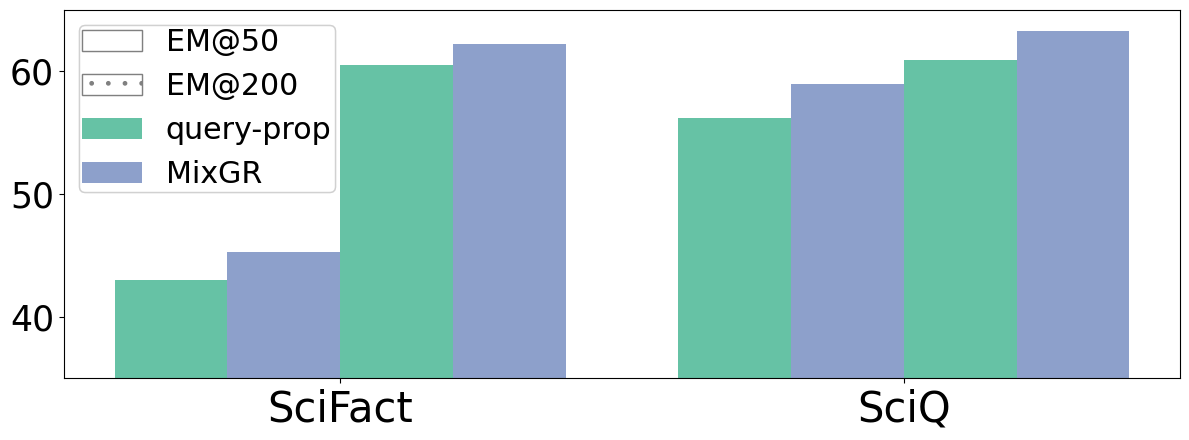

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm

# Data
data = {
    'SciFact': {
        'EM@50': {'query-prop': 43.0, 'MixGR': 45.3},
        'EM@200': {'query-prop': 60.5, 'MixGR': 62.2}
    },
    'SciQ': {
        'EM@50': {'query-prop': 56.2, 'MixGR': 59.0},
        'EM@200': {'query-prop': 60.9, 'MixGR': 63.3}
    },
}

# Convert data to a DataFrame
df = pd.DataFrame([
    {"Dataset": dataset, "Metric": metric, "Method": method, "Score": score}
    for dataset, metrics in data.items()
    for metric, methods in metrics.items()
    for method, score in methods.items()
])

# Define colors for methods using viridis palette
method_colors = {
    'query-prop': '#66c2a5',  # Teal
    'MixGR': '#8da0cb'  # Green
}

# Define hatch patterns for metrics
metric_hatches = {
    'EM@50': '',
    'EM@200': '.'
}

# Plotting with Matplotlib
fig, ax = plt.subplots(figsize=(12, 4.5))

# Unique datasets, methods, and metrics
datasets = df['Dataset'].unique()
methods = df['Method'].unique()
metrics = df['Metric'].unique()

# Width of a single bar
bar_width = 0.2

# Calculate the positions for each bar
bar_positions = []
for i, dataset in enumerate(datasets):
    for j, metric in enumerate(metrics):
        for k, method in enumerate(methods):
            bar_positions.append(i + j * (len(methods) * bar_width) + k * bar_width + 0.1)

# Plotting the bars
bars = []
for i, (dataset, metric, method, score) in enumerate(zip(df['Dataset'], df['Metric'], df['Method'], df['Score'])):
    offset = bar_positions[i]
    bar = ax.bar(offset, score, color=method_colors[method], width=bar_width, edgecolor='none', hatch=metric_hatches[metric])
    bars.append(bar)

# Adding labels and title
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('', fontsize=16)
ax.set_xticks([r + (len(metrics) * len(methods) * bar_width) / 2 for r in range(len(datasets))])
ax.set_xticklabels(datasets, fontsize=30)
ax.set_ylim(35, 65)

# Custom legend for methods
method_patches = [Patch(facecolor=method_colors[method], edgecolor='none', label=method) for method in methods]

# Custom legend for metrics
hatch_patches = [Patch(facecolor='white', edgecolor='grey', hatch=metric_hatches[metric], label=metric) for metric in metrics]

# Combine legends
combined_legend = ax.legend(handles=hatch_patches + method_patches, title='', fontsize=21.6, loc=2, borderpad=0.1)
ax.add_artist(combined_legend)

# Show the plot
plt.tight_layout()
plt.savefig('extention_to_proposition.pdf')
plt.show()


### Section 6.2: BM25

In [ ]:
{
    'SciFact': {
        'Original': 68.5,
        'MixGR': 71.0,
        'BM25': 69.2,
    },
    'SciDocs':  {
        'Original': 18.5,
        'MixGR': 20.7,
        'BM25': 19.9,
    },
    'NFCorpus': {
        'Original': 34.9,
        'MixGR': 37.1,
        'BM25': 30.65,
    },
    'SciQ':  {
        'Original': 70.0,
        'MixGR': 86.7,
        'BM25': 92.2,
    }
}


/scratch/92771/ipykernel_558910/3423460148.py:39: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='Dataset', y='Score', hue='Method', data=df, palette=['#3c5488', '#4dbbd5', '#00a087', '#e69f00'])


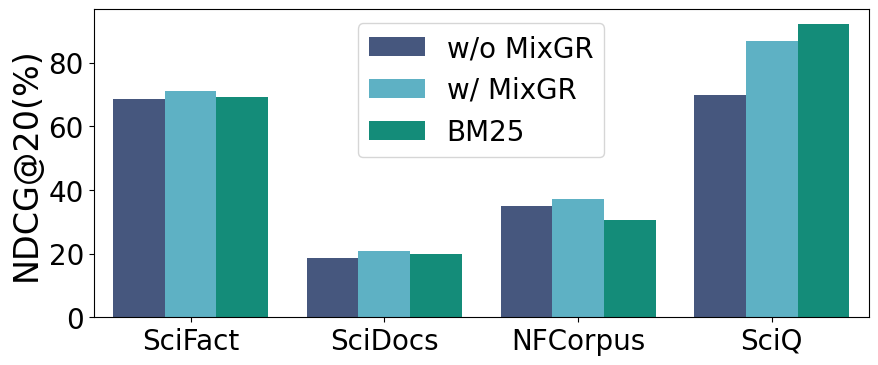

In [508]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the dictionary
data = {
    'SciFact': {
        'w/o MixGR': 68.5,
        'w/ MixGR': 71.0,
        'BM25': 69.2,
    },
    'SciDocs':  {
        'w/o MixGR': 18.5,
        'w/ MixGR': 20.7,
        'BM25': 19.9,
    },
    'NFCorpus': {
        'w/o MixGR': 34.9,
        'w/ MixGR': 37.1,
        'BM25': 30.65,
    },
    'SciQ':  {
        'w/o MixGR': 70.0,
        'w/ MixGR': 86.7,
        'BM25': 92.2,
    }
}

# Convert the data into a DataFrame for easier plotting with Seaborn
data_list = []
for dataset, scores in data.items():
    for method, score in scores.items():
        data_list.append([dataset, method, score])

df = pd.DataFrame(data_list, columns=['Dataset', 'Method', 'Score'])

# Plotting the data
plt.figure(figsize=(10, 4))
sns.barplot(x='Dataset', y='Score', hue='Method', data=df, palette=['#3c5488', '#4dbbd5', '#00a087', '#e69f00'])

# Set labels and title
plt.ylabel('NDCG@20(%)')

plt.xlabel('')


# Adjust the legend
plt.legend(fontsize=20, title_fontsize='13')

plt.savefig("contriever_bm25.pdf", format='pdf')

# Show the plot
plt.show()


### Section 6.3: Ablation study

In [45]:
scifact_ablation[0]['avg']

{'NDCG@5': 0.5017183333333333,
 'NDCG@20': 0.5463049999999999,
 'Recall@5': 0.5863750000000001,
 'Recall@20': 0.7303683333333333}

In [51]:
# dict_ = {dataset: {'-conv': ...}, ...}
ablation_dict = {}
for dataset, ablations in {'nfcorpus': nfcorpus_ablation, 'scidocs': scidocs_ablation, 'scifact': scifact_ablation, 'sciq': sciq_ablation}.items():
    ablation_dict[dataset] = {}
    for type_idx, ablation_type in enumerate(['-conv', '-prop', '-whole', 'mixgr']):
        ablation = ablations[type_idx]
        ablation_dict[dataset][ablation_type] = ablation['avg']['NDCG@20']
        
ablation_dict        

{'nfcorpus': {'-conv': 0.28202,
  '-prop': 0.28897833333333334,
  '-whole': 0.28602,
  'mixgr': 0.29142333333333337},
 'scidocs': {'-conv': 0.15744666666666665,
  '-prop': 0.15874,
  '-whole': 0.15528666666666666,
  'mixgr': 0.16227166666666668},
 'scifact': {'-conv': 0.5463049999999999,
  '-prop': 0.5552,
  '-whole': 0.5483033333333334,
  'mixgr': 0.55958},
 'sciq': {'-conv': 0.7910150000000001,
  '-prop': 0.812065,
  '-whole': 0.807265,
  'mixgr': 0.848585}}

/scratch/92771/ipykernel_558910/519703109.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=subset, x='Measurement', y='Score', ax=ax, palette='viridis', width=0.8)
/scratch/92771/ipykernel_558910/519703109.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=subset, x='Measurement', y='Score', ax=ax, palette='viridis', width=0.8)
/scratch/92771/ipykernel_558910/519703109.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=subset, x='Measurement', y='Score', ax=ax, palette='viridis', width=0.8

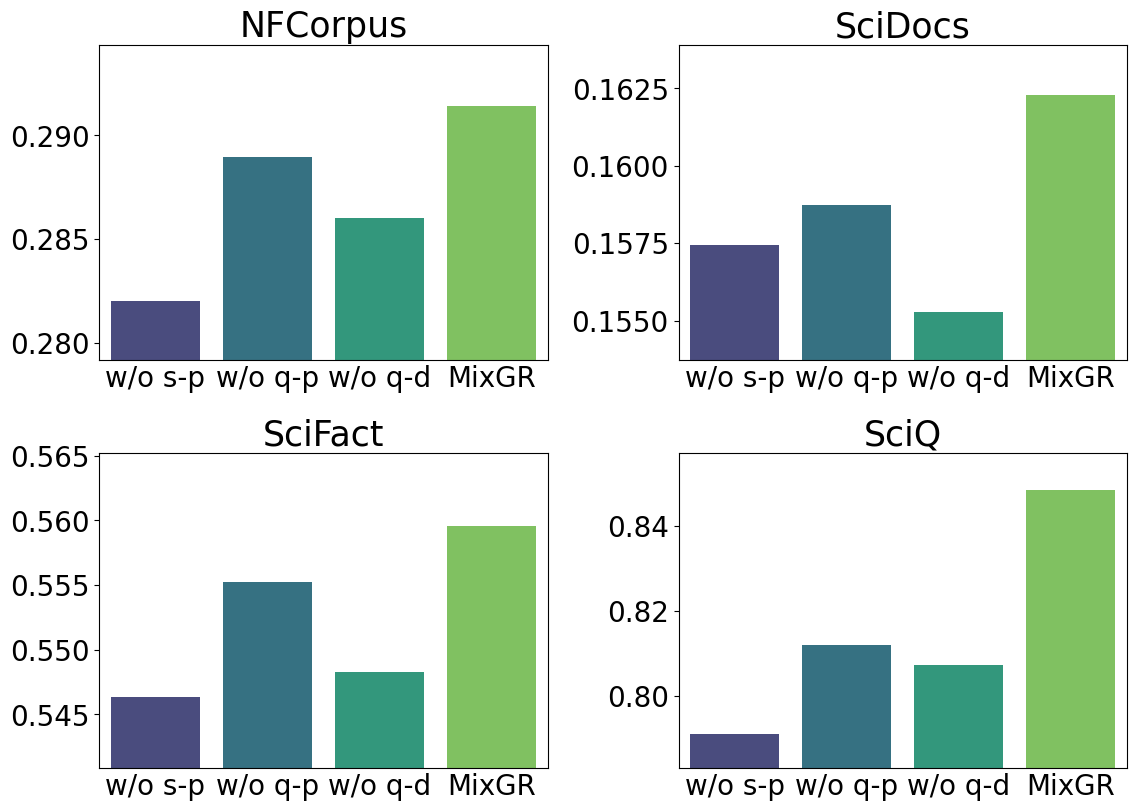

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data conversion to DataFrame
data = {
    'Dataset': [],
    'Measurement': [],
    'Score': []
}

datasets = {
    'NFCorpus': {'w/o s-p': 0.28202, 'w/o q-p': 0.288978, 'w/o q-d': 0.28602, 'MixGR': 0.291423},
    'SciDocs': {'w/o s-p': 0.157447, 'w/o q-p': 0.15874, 'w/o q-d': 0.155287, 'MixGR': 0.162272},
    'SciFact': {'w/o s-p': 0.546305, 'w/o q-p': 0.5552, 'w/o q-d': 0.548303, 'MixGR': 0.55958},
    'SciQ': {'w/o s-p': 0.791015, 'w/o q-p': 0.812065, 'w/o q-d': 0.807265, 'MixGR': 0.848585}
}

for dataset, measurements in datasets.items():
    for measurement, score in measurements.items():
        data['Dataset'].append(dataset)
        data['Measurement'].append(measurement)
        data['Score'].append(score)

df = pd.DataFrame(data)

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each dataset in its respective subplot
for i, (dataset, ax) in enumerate(zip(datasets, axes)):
    subset = df[df['Dataset'] == dataset]
    barplot = sns.barplot(data=subset, x='Measurement', y='Score', ax=ax, palette='viridis', width=0.8)
    ax.set_title(dataset, fontsize=25)
    ax.set_ylim(0.99 * subset['Score'].min(), 1.01 * subset['Score'].max())
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label
    ax.tick_params(axis='x', length=0, labelsize=20)  # Remove x-axis ticks
    ax.tick_params(axis='y', labelsize=20) 
#     ax.tick_params(labelbottom=False)  # Hide x-axis tick labels

# Place a legend at the bottom of the figure
# handles, labels = axes[0].get_legend_handles_labels()  # Get legend from the first plot
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=4, fontsize=100)

# Adjust layout to make space for the legend
plt.tight_layout(pad=3.0)
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin to make space for the larger legend
plt.savefig('./ablation.pdf', bbox_inches='tight')

plt.show()